# Prototyping data and model training

Two main pieces I'm checking are data.ImagenetteDataLoader() and training.ModelTrainer() classes.

LD Nov 2020

# Data

In [1]:
import torch
import numpy as np
from src.data import ImagenetteDataLoader, Imagenette, ToTensor, get_train_validation_data
from torchvision import transforms

## Get approximate image statistics (mean, stdev) of training set
To be used w/ normalization transform.
Compute average channel-mean across all images.
Compute average channel-stdev across all images.

In [2]:
# tmp = Imagenette('../data/imagenette2-320')
# n_images = len(tmp)

# mu = np.zeros(3)
# sigma = np.zeros(3)
# for data in tmp:
#     img = data['image']/255./n_images
#     mu += img.mean(axis=(0,1))
#     sigma += img.std(axis=(0,1))

# print(f'mean = {mu};\nsigma = {sigma}')

## DataLoader

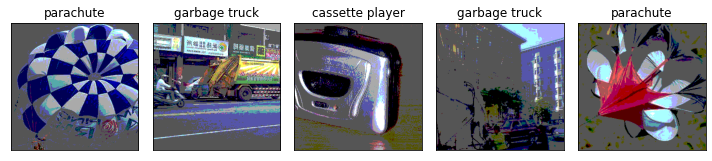

In [2]:
mu2 = np.array([0.46254329, 0.45792598, 0.42990307])*255
sigma2 = np.array([0.24124826, 0.23532296, 0.24335882])*255
transform = transforms.Compose([ToTensor(),
                                transforms.Normalize(mu2, sigma2),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomCrop(256)
                               ])

train_loader = ImagenetteDataLoader(root_dir='../data/imagenette2-320', train=True, crop_size=256,
                          batch_size=64, shuffle=True, num_workers=0, transform=transform)
train_loader.show_batch()

# Model training

In [3]:
from src.training import ModelTrainerVGG16


In [4]:
train_loader, valid_loader = get_train_validation_data(root_dir='../data/imagenette2-320',
                                                       batch_size=2,
                                                       crop_size=128)

In [5]:
trainer = ModelTrainerVGG16(train_loader, valid_loader)

In [6]:
trainer.train(num_epochs=1, print_every=1)


/Users/lyndonduong/anaconda3/envs/bml_project/lib/python3.8/site-packages/jacobian/jacobian.py:70: UserWarning: This overload of addcdiv is deprecated:
	addcdiv(Tensor input, Number value, Tensor tensor1, Tensor tensor2, *, Tensor out)
Consider using one of the following signatures instead:
	addcdiv(Tensor input, Tensor tensor1, Tensor tensor2, *, Number value, Tensor out) (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1603740477510/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  v=torch.addcdiv(arxilirary_zero, 1.0, v, vnorm)


20/11/13|19:13:16 |INFO: Epoch 1/1|Batch 0/947: (LossBase, LossReg)= (2.42, 152.91)
20/11/13|19:15:50 |INFO: Epoch 1/1|Batch 1/947: (LossBase, LossReg)= (4.81, 92.42)
20/11/13|19:18:10 |INFO: Epoch 1/1|Batch 2/947: (LossBase, LossReg)= (4.23, 63.48)
20/11/13|19:20:34 |INFO: Epoch 1/1|Batch 3/947: (LossBase, LossReg)= (4.46, 59.13)
20/11/13|19:22:54 |INFO: Epoch 1/1|Batch 4/947: (LossBase, LossReg)= (5.13, 33.92)
20/11/13|19:25:16 |INFO: Epoch 1/1|Batch 5/947: (LossBase, LossReg)= (3.23, 21.26)
20/11/13|19:27:36 |INFO: Epoch 1/1|Batch 6/947: (LossBase, LossReg)= (1.78, 21.88)
20/11/13|19:29:53 |INFO: Epoch 1/1|Batch 7/947: (LossBase, LossReg)= (4.58, 26.21)
20/11/13|19:32:18 |INFO: KeyboardInterrupt/SystemExit error. Checkpointing training state to checkpoint_dict.
